<a href="https://colab.research.google.com/github/Data-Analytics-with-Python/individual-assignment-i-mozzimmashafique-jpg/blob/main/individual_assignment_mozzimmashafique_natasupermarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTANT: Before you start, enter your name and student number below.

**Full Name: Mozzimma Shafique

**Student Number:400643800

# Exploring Customer Data with Pandas

Use the provided Nata Supermarkets dataset to answer the following questions.
Your goal is to use Pandas operations to explore, clean, and summarize the data, and to draw a few simple insights about customer demographics and behavior.

Please complete all task requested and answer all questions explicitly and support your answers with Python codes. Insert code and text cells as you need.

## 1. Inspecting and loading the Data (10pts)

* Save the dataset in the case supplementary file (in Excel) as a csv file and upload it to Colab.

* Load the dataset as a pandas data frame and display the first few rows.

    * How many features (columns) and records (rows) are in the dataset?

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/mozzimmashafique-jpg/Nata-Supermarket/refs/heads/main/NATA%20Supermarket.csv"
df = pd.read_csv(url)

print(df.head())

print("shape of dataset:", df.shape)


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-04-09       58       635  ...                  7             0   
1  2014-08-03       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  2014-10-02       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

## 2. Data Cleaning and Missing Values (14pts)

* Check for missing values across all columns.

* Which columns contain missing data, and how many missing entries are there?

* What strategies could you use to handle them (drop, fill, or ignore)? Apply one reasonable approach and explain your choice.

In [ ]:
print("Missing values in each column:")
print(df.isnull().sum())



Missing values in each column:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Columns with missing data:
Index(['Income'], dtype='object')


In [ ]:
print("\nColumns with missing data:")
print(df.columns[df.isnull().any()])


Columns with missing data:
Index(['Income'], dtype='object')


In [ ]:
print(df.isnull().sum())
df = df.fillna(0)


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


I checked the dataset for missing values and ended up choosing to handle it by filling all missing entries with zero. I believe this approach is simple to use and it also ensures that i dont lose any reocrds from the dataset.

## 3. Removing Constant Columns (14pts)

* Identify any columns with constant values (no variance; all rows have the same value).

* Drop them from your DataFrame and confirm how many columns remain.

In [ ]:
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
print("Constant columns:", constant_cols)


Constant columns: ['Z_CostContact', 'Z_Revenue']


In [ ]:
df = df.drop(columns=constant_cols)
print("Number of columns after removal:", df.shape[1])

Number of columns after removal: 27


the columns with constant vlaues are costcontact and revenue and after dropping them from dataframe the total column remains are 27

## 4. Add a new column (15pts)

* Add a new column **Customer_Days** to store the total number of days each customer has been with the company. You may follow the steps below:
  * use `pd.to_datetime(df["Dt_Customer"])` to convert the string variable to a *date-time* variable

  * use `today = datetime.today()` to find the date of today

  * use `(today - df["Dt_Customer"]).dt.days` to find the difference between today and the onbard date.

In [ ]:

from datetime import datetime

df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

today = datetime.today()

df["Customer_Days"] = (today - df["Dt_Customer"]).dt.days

print(df[["Dt_Customer", "Customer_Days"]].head())

  Dt_Customer  Customer_Days
0  2012-04-09         4938.0
1  2014-08-03         4092.0
2         NaT            NaN
3  2014-10-02         4032.0
4         NaT            NaN


## 5. Categorical Features (15 pts)

* For `Education` and `Marital_Status`,

  * find how many customers fall into each category
  * create pie charts to show the percentage of each category; make sure to show the percentage numbers on the chart with 2 decimal places

* What do you findings suggest about the company's target demographic?

<Axes: title={'center': 'Education Distribution'}, ylabel='count'>

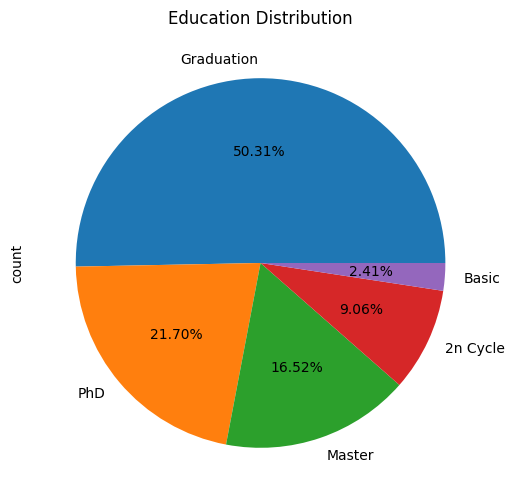

In [ ]:
df["Education"].value_counts().plot.pie(
    autopct="%.2f%%",
    figsize=(6, 6),
    title="Education Distribution"
)

<Axes: title={'center': 'Marital Status Distribution'}, ylabel='count'>

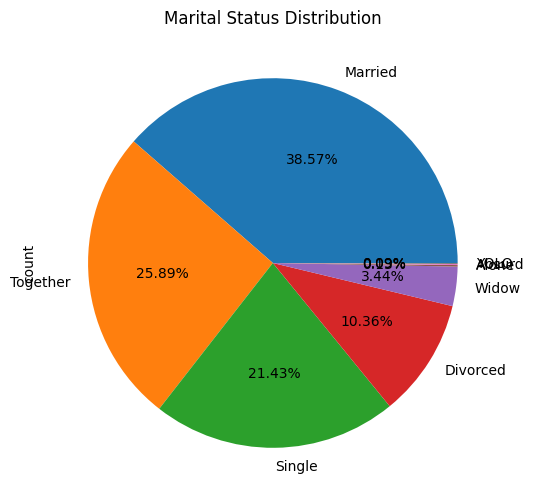

In [ ]:
df["Marital_Status"].value_counts().plot.pie(
    autopct="%.2f%%",
    figsize=(6, 6),
    title="Marital Status Distribution"
)

my findings suggested most customers are in the top education cateogry group and their marital status indicatss that the company main target demographics are educated and married people

## 6. Numeric Variables (15pts)

* For `Income`, `Kidhome`, and `Teenhome`,
  * use boxplots to visualize their distributions.

* Based on these distributions, what can you say about the typical household profile of Nata's customers?

<Axes: >

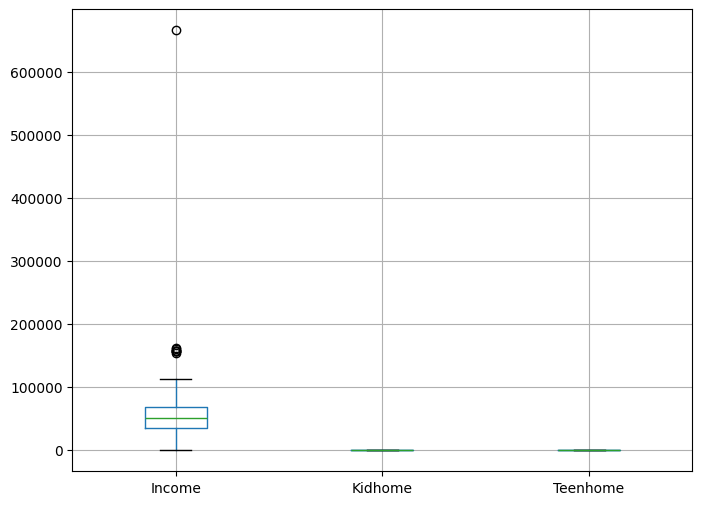

In [ ]:
df[["Income", "Kidhome", "Teenhome"]].boxplot(figsize=(8,6))

the typical household profile of Nata customers  shows that most customers have lower number of children and teenagers usually 0 to 1 and majority of income distribution falls under middle range which indicates that Nata typical customers are from small household with medium income

## 7. Spending by Products (15pts)

* Examine the spending amount columns `MntWines`,	`MntFruits`,	`MntMeatProducts`,	`MntFishProducts`,	`MntSweetProducts`,	`MntGoldProds`, and find the product with the highest total spending amount by all customers.



In [ ]:
products = ["MntWines", "MntFruits", "MntMeatProducts",
            "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

total_spending = df[products].sum()

max_product = total_spending.idxmax()

max_spending = total_spending.max()

print("Product with the highest total spending:", max_product)
print("Total spending amount:", max_spending)

Product with the highest total spending: MntWines
Total spending amount: 680816


## 8. Use of Gen. AI (2pts)

Use of Generative AI is allowed. Briefly describe if and how you have used Gen. AI tools in this assignment.

i used the AI tool to supporet my understanding of how to write the python code and whenever there was error, i used AI tool to help me understand where im going wrong as it gave me clarity but all the coding decisins and implementation is done by me